<a href="https://colab.research.google.com/github/mttbanizi/PowerPlant-ML/blob/main/PowerPlant_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
https://rosenfelder.ai/multi-input-neural-network-pytorch/
```



In [1]:
pip install pytesseract

In [2]:
import cv2
import pytesseract
import numpy as np

In [3]:
# image = cv2.imread('7.jpg')

In [4]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
csv_file_path = 'data.csv'  # Replace with the actual path to your CSV file
data_frame = pd.read_csv(csv_file_path)

# Now you can work with the pandas DataFrame 'data_frame'
# For example, you can print the first few rows of the DataFrame:
print(data_frame.head())

   11 19:58  346.328  133.408  33.298  301.484  124.509  306.326  131.007
0  11 20:58  310.272  142.474  32.017  396.497  125.188  436.629  131.780
1  11 21:58  305.023  143.402  31.036  399.970  125.666  439.996  132.644
2  11 22:58  246.803  145.404  30.811  399.976  117.174  439.991  123.214
3  11 23:58  231.144  146.174  31.650  400.008  115.559  439.964  122.931
4  12 00:58  220.564  147.361  30.994  399.911  116.726  439.964  124.278


In [5]:
new_column_titles = ['time', 'pressure', 'Steem MW', 'AmientTemp', 'B1_Flow', 'G1_MW', 'B2_Flow', 'G2_MW']

# Assign the new column titles to the DataFrame
data_frame.columns = new_column_titles

In [6]:
print(data_frame.head())

       time  pressure  Steem MW  AmientTemp  B1_Flow    G1_MW  B2_Flow  \
0  11 20:58   310.272   142.474      32.017  396.497  125.188  436.629   
1  11 21:58   305.023   143.402      31.036  399.970  125.666  439.996   
2  11 22:58   246.803   145.404      30.811  399.976  117.174  439.991   
3  11 23:58   231.144   146.174      31.650  400.008  115.559  439.964   
4  12 00:58   220.564   147.361      30.994  399.911  116.726  439.964   

     G2_MW  
0  131.780  
1  132.644  
2  123.214  
3  122.931  
4  124.278  


In [7]:
# data_frame['Flow'] = data_frame['B1_Flow'].astype(float) + data_frame['B2_Flow'].astype(float)
data_frame['G_MW'] = data_frame['G1_MW'].astype(float) + data_frame['G2_MW'].astype(float)
print(data_frame.head())

       time  pressure  Steem MW  AmientTemp  B1_Flow    G1_MW  B2_Flow  \
0  11 20:58   310.272   142.474      32.017  396.497  125.188  436.629   
1  11 21:58   305.023   143.402      31.036  399.970  125.666  439.996   
2  11 22:58   246.803   145.404      30.811  399.976  117.174  439.991   
3  11 23:58   231.144   146.174      31.650  400.008  115.559  439.964   
4  12 00:58   220.564   147.361      30.994  399.911  116.726  439.964   

     G2_MW     G_MW  
0  131.780  256.968  
1  132.644  258.310  
2  123.214  240.388  
3  122.931  238.490  
4  124.278  241.004  


In [8]:
# print(data_frame)

In [9]:
data_frame.at[37,'B1_Flow'] = 400

In [10]:
# result = data_frame[data_frame['B1_Flow'].str.contains('r')]
# print(result)

In [11]:
data_frame['Flow'] = data_frame['B1_Flow'].astype(float) + data_frame['B2_Flow'].astype(float)
print(data_frame.head())

       time  pressure  Steem MW  AmientTemp  B1_Flow    G1_MW  B2_Flow  \
0  11 20:58   310.272   142.474      32.017  396.497  125.188  436.629   
1  11 21:58   305.023   143.402      31.036  399.970  125.666  439.996   
2  11 22:58   246.803   145.404      30.811  399.976  117.174  439.991   
3  11 23:58   231.144   146.174      31.650  400.008  115.559  439.964   
4  12 00:58   220.564   147.361      30.994  399.911  116.726  439.964   

     G2_MW     G_MW     Flow  
0  131.780  256.968  833.126  
1  132.644  258.310  839.966  
2  123.214  240.388  839.967  
3  122.931  238.490  839.972  
4  124.278  241.004  839.875  


In [12]:
data_frame_Modified = data_frame.drop(columns=['B1_Flow','B2_Flow','G1_MW', 'G2_MW'])
data_frame_Modified = data_frame_Modified.sort_values(by='Steem MW')

In [13]:
data_frame_Modified = data_frame_Modified.reset_index(drop=True)

In [14]:
print(data_frame_Modified)

        time  pressure  Steem MW  AmientTemp     G_MW     Flow
0   12 17:58   364.315   134.021      35.901  256.289  626.694
1   12 18:58   362.293   134.215      34.700  256.934  557.287
2   12 16:58   350.456   134.935      37.516  255.058  626.297
3   12 15:58   354.372   135.036      37.297  255.034  635.316
4   12 19:58   340.949   135.883      33.254  258.033  626.033
5   12 13:58   353.162   136.982      36.349  252.471  776.088
6   12 12:58   350.716   137.837      35.653  252.708  778.697
7   12 14:58   351.172   139.170      36.887  254.875  774.057
8   13 06:58   214.926   139.477      28.271  224.637  860.056
9   12 20:58   317.867   140.260      31.820  259.627  719.371
10  13 15:58   368.036   140.814      35.498  258.806  863.453
11  13 14:58   355.787   141.678      35.265  258.819  860.757
12  12 11:58   318.158   141.781      34.941  253.240  844.711
13  13 05:58   225.313   142.369      27.490  228.727  858.559
14  13 16:58   347.637   142.401      35.474  259.599  

In [15]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [16]:
X = data_frame_Modified[['pressure','G_MW','Flow']].values
y = data_frame_Modified['Steem MW']


In [17]:
X.shape

(52, 3)

In [18]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(41, 41, 11, 11)

In [19]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

ValueError: ignored

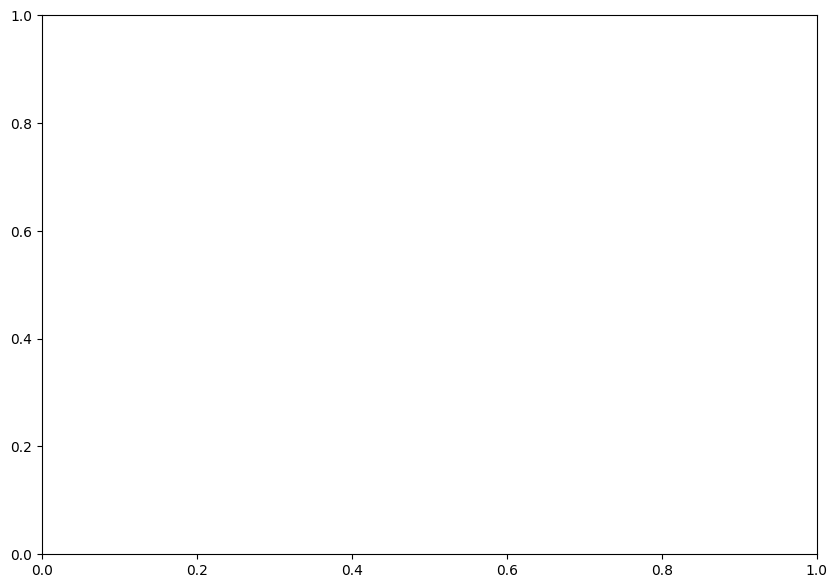

In [20]:
plot_predictions();

In [ ]:
class PowerPredictionModel(nn.Module):
    def __init__(self, input_dim):
        super(PowerPredictionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)  # Input layer to hidden layer
        self.fc2 = nn.Linear(32, 16)         # Hidden layer to another hidden layer
        self.fc3 = nn.Linear(16, 1)
                  # Final hidden layer to output

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model
input_dim = 3  # Number of input features
model = PowerPredictionModel(input_dim)


In [ ]:
import torch.optim as optim

In [ ]:
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer_1 = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
num_epochs = 100
for epoch in range(num_epochs):
    inputs = torch.tensor(X_train, dtype=torch.float32).unsqueeze(dim=1)
    targets = torch.tensor(y_train, dtype=torch.float32).unsqueeze(dim=1)
    input_dim = inputs.size(dim=0)
    optimizer_1.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


In [ ]:
model.eval()
with torch.no_grad():
    test_inputs = torch.tensor(X_test, dtype=torch.float32).unsqueeze(dim=1)
    predictions = model(test_inputs)

# Calculate the evaluation metrics (e.g., RMSE, MAE)
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, predictions.numpy())
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, predictions.numpy())

print(f'RMSE: {rmse:.4f}, MAE: {mae:.4f}')


In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

In [ ]:
X1 = data_frame_Modified[['pressure']].values
X2 = data_frame_Modified['G_MW'].values
X3 = data_frame_Modified['Flow'].values

In [ ]:
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X1_train, X2_train, X3_train, y1_train = X1[:train_split], X2[:train_split], X3[:train_split], y[:train_split]
X1_test, X2_test, X3_test, y1_test = X1[train_split:], X2[train_split:], X3[train_split:], y[train_split:]


In [ ]:
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.features = nn.Sequential(
          nn.Linear(in_features=input_dim, out_features=10),
          nn.Linear(in_features=10, out_features=10),
          nn.Linear(in_features=10, out_features=1),
          nn.ReLU() # <- add in ReLU activation function
          # Can also put sigmoid in the model
          # This would mean you don't need to use it on the predictions
          # self.sigmoid = nn.Sigmoid()
        )

    def forward(self, X1):
      # Intersperse the ReLU activation function between layers
      X1_feature = self.features(X1)
      # X2_feature = self.features(X2)
      # X3_feature = self.features(X3)
      # return torch.cat((X1_feature, X2_feature, X3_feature), 1)
      return X1_feature
      #  return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2(input_dim=1).to(device)
print(model_3)
model_3.state_dict()

In [ ]:
# import torch.optim as optim
# # Create loss function
# loss_fn = nn.L1Loss()

# # Create optimizer
# optimizer = torch.optim.SGD(params=model_3.parameters(), # optimize newly created model's parameters
#                             lr=0.01)

In [ ]:
# Setup loss and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
y_test = list(y_test)

In [ ]:
X1_train, X1_test = torch.as_tensor(X1_train, dtype=torch.float32).to(device).unsqueeze(dim=1), torch.as_tensor(X1_test,  dtype=torch.float32).to(device).unsqueeze(dim=1)
X2_train, X2_test = torch.as_tensor(X2_train, dtype=torch.float32).to(device).unsqueeze(dim=1), torch.as_tensor(X2_test, dtype=torch.float32).to(device).unsqueeze(dim=1)
X3_train, X3_test = torch.as_tensor(X3_train).to(device).unsqueeze(dim=1), torch.as_tensor(X3_test).to(device).unsqueeze(dim=1)
y_train, y_test = torch.as_tensor(y_train).to(device).unsqueeze(dim=1),  torch.as_tensor(y_test).to(device)


In [ ]:
X1_train.shape

In [ ]:
# Fit the model
torch.manual_seed(42)
epochs = 100

# Put all data on target device

for epoch in range(epochs):
    model_3.train()
    # 1. Forward pass
    # y_logits = model_3(X1_train, X2_train, X3_train)
    y_logits = model_3(X2_train )
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    print(y_logits[1])
    print(y_train[1])
    # print(model_3.state_dict())
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train).to(torch.float32) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    print(f"loss: {loss.dtype}")
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X2_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits.unsqueeze(dim=1), y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

In [ ]:
y_test.shape

In [ ]:
model_3

In [ ]:
model_3.state_dict()

In [ ]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

In [ ]:
X2_train = X2_train
X2_test = X2_test
y_test = y_test.unsqueeze(dim=1)

In [ ]:
epochs = 1000
for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X2_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X2_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

In [ ]:
test_pred.shape

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler

train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# Data Preprocessing
data = ...  # Your data here
pressure_1 = data_frame_Modified['pressure'].values.reshape(-1, 1)
steem_mw_1 = data_frame_Modified['Steem MW'].values.reshape(-1, 1)
pressure = pressure_1[:train_split]
steem_mw = steem_mw_1[:train_split]
test_pressure = pressure_1[train_split:]  # Remaining data for testing
test_steem_mw = steem_mw_1[train_split:]  # Corresponding "Steem MW" values for testing
print(train_split)
print(test_pressure)
scaler = MinMaxScaler()
pressure = scaler.fit_transform(pressure)
steem_mw = scaler.fit_transform(steem_mw)

# Model Architecture
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

input_dim = 1  # Only the 'pressure' feature
model = RegressionModel(input_dim)

# Loss Function and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training Loop
num_epochs = 100
for epoch in range(num_epochs):
    inputs = torch.tensor(pressure, dtype=torch.float32)
    targets = torch.tensor(steem_mw, dtype=torch.float32)

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Make Predictions
model.eval()
with torch.no_grad():
    print(test_pressure.shape )
    normalized_test_pressure = scaler.transform(test_pressure)
    predicted_steem_mw = model(torch.tensor(normalized_test_pressure, dtype=torch.float32)).numpy()
    predicted_steem_mw = scaler.inverse_transform(predicted_steem_mw)
    print(predicted_steem_mw)
# Evaluate the model's predictions
# You can use metrics like MAE or RMSE to assess the model's performance.


41
[[236.23 ]
 [259.899]
 [221.842]
 [196.75 ]
 [218.371]
 [222.636]
 [220.819]
 [189.785]
 [187.1  ]
 [210.308]
 [205.62 ]]
Epoch [1/100], Loss: 3.9881
Epoch [11/100], Loss: 3.3846
Epoch [21/100], Loss: 2.8407
Epoch [31/100], Loss: 2.3605
Epoch [41/100], Loss: 1.9441
Epoch [51/100], Loss: 1.5888
Epoch [61/100], Loss: 1.2896
Epoch [71/100], Loss: 1.0410
Epoch [81/100], Loss: 0.8371
Epoch [91/100], Loss: 0.6718
(11, 1)
[[127.61402]
 [126.44748]
 [128.32314]
 [129.5598 ]
 [128.49419]
 [128.284  ]
 [128.37355]
 [129.90306]
 [130.0354 ]
 [128.89159]
 [129.12263]]


In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler

train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing

pressure_1 = data_frame_Modified['pressure'].values.reshape(-1, 1)
Flow_1 = data_frame_Modified['Flow'].values.reshape(-1, 1)
G_MW_1 = data_frame_Modified['G_MW'].values.reshape(-1, 1)

pressure = pressure_1[:train_split]
Flow = Flow_1[:train_split]
G_MW = G_MW_1[:train_split]

test_pressure = pressure_1[train_split:]
test_Flow = Flow_1[train_split:]
test_G_MW = G_MW_1[train_split:]

scaler = MinMaxScaler()
pressure = scaler.fit_transform(pressure)
Flow = scaler.fit_transform(Flow)
G_MW = scaler.fit_transform(G_MW)

# Model Architecture
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

input_dim = 3  # Only the 'pressure' feature
model = RegressionModel(input_dim)

# Loss Function and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training Loop
num_epochs = 100
for epoch in range(num_epochs):
    inputs = torch.tensor(
        np.column_stack((pressure, Flow, G_MW)),
        dtype=torch.float32
    )
    targets = torch.tensor(steem_mw, dtype=torch.float32)

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Make Predictions
model.eval()
with torch.no_grad():
    print(test_pressure.shape )
    normalized_test_pressure = scaler.transform(test_pressure)
    normalized_test_Flow = scaler.transform(test_Flow)
    normalized_test_G_MW = scaler.transform(test_G_MW)

    normalized_test_inputs = np.column_stack(
        (normalized_test_pressure, normalized_test_Flow, normalized_test_G_MW)
    )

    predicted_steem_mw = model(torch.tensor(normalized_test_inputs, dtype=torch.float32)).numpy()
    print(predicted_steem_mw)
    predicted_steem_mw = scaler.inverse_transform(predicted_steem_mw)
    print(predicted_steem_mw)

# Evaluate the model's predictions
# You can use metrics like MAE or RMSE to assess the model's performance.

Epoch [1/100], Loss: 0.2657
Epoch [11/100], Loss: 0.1605
Epoch [21/100], Loss: 0.1337
Epoch [31/100], Loss: 0.1037
Epoch [41/100], Loss: 0.0807
Epoch [51/100], Loss: 0.0624
Epoch [61/100], Loss: 0.0486
Epoch [71/100], Loss: 0.0386
Epoch [81/100], Loss: 0.0315
Epoch [91/100], Loss: 0.0267
(11, 1)
[[12.058666]
 [10.895791]
 [11.0934  ]
 [11.030042]
 [11.175705]
 [11.39938 ]
 [11.88551 ]
 [11.042794]
 [11.041427]
 [11.359121]
 [11.37264 ]]
[[690.68036]
 [645.7375 ]
 [653.3747 ]
 [650.926  ]
 [656.55566]
 [665.20026]
 [683.98816]
 [651.4189 ]
 [651.366  ]
 [663.64435]
 [664.16675]]


In [39]:
from sklearn.preprocessing import MinMaxScaler

# Assuming you have separate scalers for pressure, temperature, and humidity
scaler_pressure = MinMaxScaler()
scaler_Flow = MinMaxScaler()
scaler_G_MW = MinMaxScaler()

# Fit each scaler to the corresponding feature
scaler_pressure.fit(pressure)
scaler_Flow.fit(Flow)
scaler_G_MW.fit(G_MW)

# Generate a new sample
new_pressure = 120
new_Flow = 450
new_G_MW = 300

# Scale the new sample using the corresponding scaler
normalized_new_pressure = scaler_pressure.transform([[new_pressure]])
normalized_new_Flow = scaler_Flow.transform([[new_Flow]])
normalized_new_G_MW = scaler_G_MW.transform([[new_G_MW]])

# Combine the normalized features into a single array
new_samples = np.array([[new_pressure, new_Flow, new_G_MW]])

# Scale the new sample using the corresponding scalers
normalized_new_samples = np.column_stack((
    scaler_pressure.transform([[new_pressure]]),
    scaler_Flow.transform([[new_Flow]]),
    scaler_G_MW.transform([[new_G_MW]])
))

# Make predictions using the model
model.eval()
with torch.no_grad():
    inputs = torch.tensor(normalized_new_samples, dtype=torch.float32)
    print(inputs)
    predicted_steem_mw = model(inputs).numpy()
    print(predicted_steem_mw)
    predicted_steem_mw = scaler.inverse_transform(predicted_steem_mw)

# Print the predicted Steem MW value
print(f"Predicted Steem MW: {predicted_steem_mw[0][0]:.2f}")

tensor([[120., 450., 300.]])
[[243.04503]]
Predicted Steem MW: 9617.84
